In [1]:
import sys
sys.path.append("../../src")
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F
import argparse
import matplotlib

from tqdm import tqdm
import glob
from PIL import Image
import os
from datetime import datetime
import time
import math

from ANN import *
from visualization import *

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                            torchvision.transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), 
                                            std=(3*0.2023, 3*0.1994, 3*0.2010))])

cifar_dset_train = torchvision.datasets.CIFAR10('../../data', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(cifar_dset_train, batch_size=20, shuffle=True, num_workers=0)

cifar_dset_test = torchvision.datasets.CIFAR10('../../data', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(cifar_dset_test, batch_size=20, shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
device = "cuda"
criterion = torch.nn.MSELoss().to(device)
# criterion = torch.nn.CrossEntropyLoss()
activation = F.relu
architecture = [int(32*32*3), 1000, 500, 500, 10]
model = MLP(architecture, activation = activation, final_layer_activation = False).to(device)

In [5]:
evaluateClassification(model, train_loader, "cuda")

Accuracy :	 0.09442


0.09442

In [6]:
# # specify optimizer (stochastic gradient descent) and learning rate
# optimizer = torch.optim.SGD(model.parameters(),lr = 0.001, momentum = 0.0)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
trn_acc_list = []
tst_acc_list = []

n_epochs = 20
for epoch_ in range(n_epochs):
    model.train()
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        y_one_hot = F.one_hot(y, num_classes=model.nc)
        optimizer.zero_grad()
        y_hat = model(x)
#         loss = criterion(y_hat,y) # Use this if criterion = torch.nn.CrossEntropyLoss()
        loss = criterion(y_hat,y_one_hot.to(torch.float32)) # Use this if criterion = torch.nn.MSELoss().to(device)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
    trn_acc = evaluateClassification(model, train_loader, device, False)
    tst_acc = evaluateClassification(model, test_loader, device, False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, Train Accuracy : {}, Test Accuracy : {}".format(epoch_+1, trn_acc, tst_acc))

2500it [00:24, 101.65it/s]
11it [00:00, 99.74it/s]

Epoch : 1, Train Accuracy : 0.45218, Test Accuracy : 0.4379


2500it [00:24, 100.64it/s]
10it [00:00, 93.69it/s]

Epoch : 2, Train Accuracy : 0.49772, Test Accuracy : 0.471


2500it [00:25, 99.49it/s] 
11it [00:00, 99.80it/s]

Epoch : 3, Train Accuracy : 0.5277, Test Accuracy : 0.4882


2500it [00:25, 98.88it/s] 
9it [00:00, 85.83it/s]

Epoch : 4, Train Accuracy : 0.55642, Test Accuracy : 0.4979


2500it [00:24, 100.11it/s]
9it [00:00, 80.38it/s]

Epoch : 5, Train Accuracy : 0.5543, Test Accuracy : 0.4944


2500it [00:24, 101.05it/s]
9it [00:00, 87.66it/s]

Epoch : 6, Train Accuracy : 0.5937, Test Accuracy : 0.5082


2500it [00:24, 101.20it/s]
10it [00:00, 97.88it/s]

Epoch : 7, Train Accuracy : 0.60558, Test Accuracy : 0.5063


2500it [00:24, 100.92it/s]
11it [00:00, 109.67it/s]

Epoch : 8, Train Accuracy : 0.62062, Test Accuracy : 0.5128


2500it [00:24, 101.60it/s]
11it [00:00, 106.34it/s]

Epoch : 9, Train Accuracy : 0.64398, Test Accuracy : 0.5243


2500it [00:25, 96.52it/s] 
11it [00:00, 106.36it/s]

Epoch : 10, Train Accuracy : 0.65676, Test Accuracy : 0.5266


2500it [00:24, 101.73it/s]
11it [00:00, 103.14it/s]

Epoch : 11, Train Accuracy : 0.6511, Test Accuracy : 0.5088


2500it [00:27, 92.34it/s]
11it [00:00, 105.32it/s]

Epoch : 12, Train Accuracy : 0.6767, Test Accuracy : 0.5244


2500it [00:25, 99.22it/s] 
9it [00:00, 85.99it/s]

Epoch : 13, Train Accuracy : 0.68828, Test Accuracy : 0.5274


2500it [00:27, 91.88it/s] 
10it [00:00, 96.79it/s]

Epoch : 14, Train Accuracy : 0.6962, Test Accuracy : 0.5288


2500it [00:26, 93.48it/s]
11it [00:00, 105.09it/s]

Epoch : 15, Train Accuracy : 0.6827, Test Accuracy : 0.5105


2500it [00:25, 99.15it/s] 
10it [00:00, 96.83it/s]

Epoch : 16, Train Accuracy : 0.70314, Test Accuracy : 0.524


2500it [00:25, 98.43it/s] 
11it [00:00, 103.89it/s]

Epoch : 17, Train Accuracy : 0.7152, Test Accuracy : 0.5287


2500it [00:25, 99.34it/s] 
10it [00:00, 97.61it/s]

Epoch : 18, Train Accuracy : 0.7142, Test Accuracy : 0.5176


2500it [00:26, 92.65it/s] 
10it [00:00, 99.43it/s]

Epoch : 19, Train Accuracy : 0.73298, Test Accuracy : 0.525


2500it [00:26, 93.12it/s] 


Epoch : 20, Train Accuracy : 0.74294, Test Accuracy : 0.526


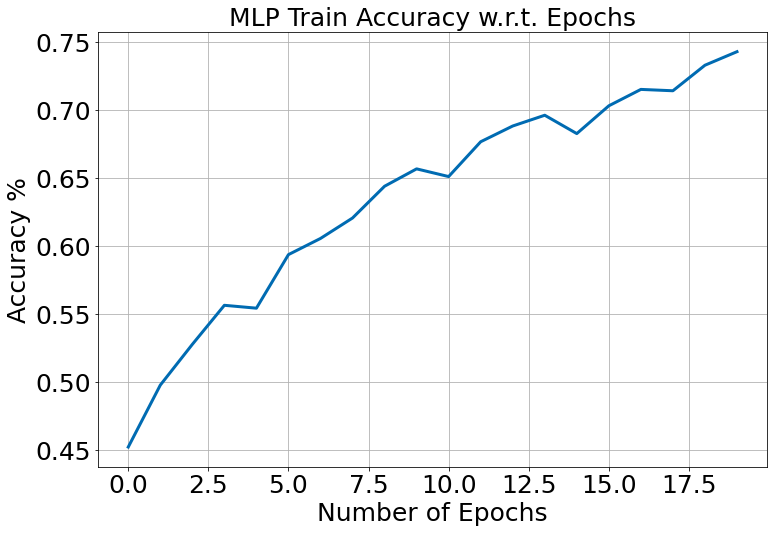

In [7]:
plot_convergence_plot(trn_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Train Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

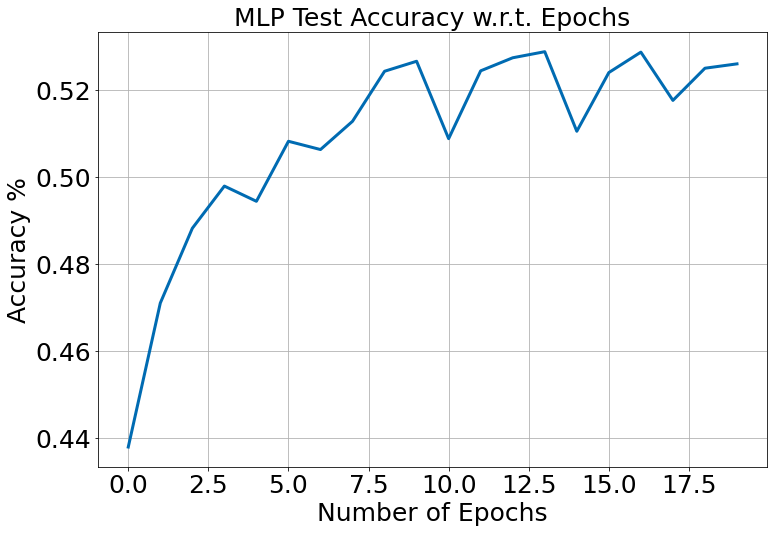

In [8]:
plot_convergence_plot(tst_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Test Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)